# Exploretory data analysis on risk factors involved in investment by Deutch Bank

## Background
Deutsche Bank is a multinational investment bank and financial services company. It offers a range of investment products to its clients, including stocks, bonds, and derivatives. The bank is concerned about the risk of investment in various products and wants to use data analysis to identify and manage potential risks.

## Objective

To perform data analysis on the investment products offered by Deutsche Bank and identify potential risks associated with each product.

## Data Collection and Preparation

To begin the analysis, the bank collects data on its investment products over the past 10 years. The data includes information on the product type, issuer, maturity date, credit rating, and other relevant factors that could impact risk.

**Table summary:**

| Sr. No. | Date | Open | High | Low | Close | Adj Close | Volume |
|---------|------|------|------|-----|-------|-----------|--------|
| ||||||||

Here individual columns are

| Column name | Description |
|-------------|-------------|
| Date | The date of the stock price, in a standardized format (e.g. YYYY-MM-DD). |
| Open | The opening price of the stock on that day. | 
| High |  The highest price of the stock on that day. |
| Low | The lowest price of the stock on that day. |
| Close | The closing price of the stock on that day. |
| Adj Close | The adjusted closing price of the stock on that day. This takes into account any corporate actions (such as stock splits or dividends) that may have affected the stock price. |
| Volume | The volume of shares traded on that day. |

### Deutsch Bank share
With this dataset, we could perform a wide range of analyses and visualizations to understand how the stock price of Deutsche Bank has changed over time, and to identify trends or patterns in the data. 

For example, we could:

- Create a line chart showing the daily closing price of the stock over time.
- Calculate the daily percentage change in the stock price, and create a histogram or density plot to visualize the distribution of these changes.
- Use technical analysis tools to identify patterns or trends in the stock price, such as moving averages or support/resistance levels.
- Perform a regression analysis to model the relationship between the stock price and other variables, such as market indices or macroeconomic indicators.
- Use machine learning algorithms to predict future stock prices based on historical data.

So, I will start with few basic things with these datas over time and compare them with each other.

1. **Basic data exploration:** You can use pandas to perform basic exploration of the data, such as checking the dimensions of the DataFrame, looking at summary statistics, or checking for missing values
    - summary statistics: `.describe()`
    - dimensions of the DataFrame: `.shape()`
    - check for missing values: `.isnull().sum())`
2. **Visualize the data using matplotlib and seaborn:** we can use these libraries to create a variety of charts and plots, such as line plots, bar plots, histograms, and scatter plots. For example, to create a line plot of the closing prices over time:
    ```
    # plot the closing price over time
    plt.plot(df['Date'], df['Close'])
    plt.title('Deutsche Bank Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.show()
    ```
3. **Calculate returns:** You can use pandas to calculate the daily returns of the stock, which can be useful for analysis and modeling:

    ```
    # calculate daily returns
    df['Return'] = df['Close'].pct_change()
    # plot the returns over time
    plt.plot(df['Date'], df['Return'])
    plt.title('Deutsche Bank Daily Returns')
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.show()
    ```
4. **Analyze relationships between variables:** You can use seaborn to create scatter plots and regression plots to explore the relationships between variables. For example, to create a scatter plot of the opening price vs. the closing price:

    ```
    # create a scatter plot of Open vs. Close
    sns.scatterplot(data=df, x='Open', y='Close')
    plt.title('Deutsche Bank Open vs. Close')
    plt.show()
    ```
5. **Rolling statistics:** You can use pandas to calculate rolling statistics such as rolling mean, rolling standard deviation, and rolling correlation. For example, to calculate the 30-day rolling mean of the closing price:
    ```
    # calculate 30-day rolling mean of closing price
    df['RollingMean'] = df['Close'].rolling(window=30).mean()
    # plot the rolling mean over time
    plt.plot(df['Date'], df['RollingMean'])
    plt.title('Deutsche Bank 30-Day Rolling Mean of Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.show()
    ```
6. **Moving average convergence divergence (MACD):** You can use pandas to calculate the MACD, a popular technical indicator used in trading. For example, to calculate the 12-day and 26-day exponential moving averages and the MACD:
    ```
    # calculate 12-day and 26-day exponential moving averages
    ema12 = df['Close'].ewm(span=12, adjust=False).mean()
    ema26 = df['Close'].ewm(span=26, adjust=False).mean()
    # calculate MACD
    macd = ema12 - ema26
    # plot the MACD over time
    plt.plot(df['Date'], macd)
    plt.title('Deutsche Bank MACD')
    plt.xlabel('Date')
    plt.ylabel('MACD')
    plt.show()
    ```
7. **Bollinger Bands:** You can use pandas to calculate Bollinger Bands, another popular technical indicator used in trading. For example, to calculate the 20-day moving average and upper and lower Bollinger Bands:

    ```
    # calculate 20-day moving average and standard deviation
    df['MA20'] = df['Close'].rolling(window=20).mean()
    df['StdDev'] = df['Close'].rolling(window=20).std()
    # calculate upper and lower Bollinger Bands
    df['UpperBand'] = df['MA20'] + 2 * df['StdDev']
    df['LowerBand'] = df['MA20'] - 2 * df['StdDev']
    # plot the Bollinger Bands over time
    plt.plot(df['Date'], df['Close'])
    plt.plot(df['Date'], df['MA20'])
    plt.plot(df['Date'], df['UpperBand'])
    plt.plot(df['Date'], df['LowerBand'])
    plt.title('Deutsche Bank Bollinger Bands')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.show()
    ```

8. **Compare with market indices:** You can use pandas to download and compare the Deutsche Bank share data with market indices such as the DAX, FTSE, or S&P 500. For example, to download the DAX data and compare it with the Deutsche Bank share data:

    ```
    import pandas_datareader.data as web
    # download DAX data from Yahoo Finance
    dax = web.DataReader('^GDAXI', 'yahoo', start, end)
    # merge DAX data with Deutsche Bank share data
    df = pd.merge(df, dax['Close'], on='Date', suffixes=('_db', '_dax'))
    # calculate daily returns for DAX
    df['Returns_DAX'] = df['Close_dax'].pct_change()
    # plot the daily returns for Deutsche Bank and DAX over time
    plt.plot(df['Date'], df['Returns'], label='Deutsche Bank')
    plt.plot(df['Date'], df['Returns_DAX'], label='DAX')
    plt.title('Deutsche Bank vs. DAX Daily Returns')
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.legend()
    plt.show()
    ```
9. **Perform statistical analysis:** You can use pandas to perform statistical analysis on the Deutsche Bank share data. For example, to calculate the mean, standard deviation, and correlation coefficient of the closing price and volume:

    ```
    # calculate mean, standard deviation, and correlation coefficient of closing price and volume
    mean_close = df['Close'].mean()
    std_close = df['Close'].std()
    mean_volume = df['Volume'].mean()
    std_volume = df['Volume'].std()
    corr = df['Close'].corr(df['Volume'])
    print('Mean closing price:', mean_close)
    print('Standard deviation of closing price:', std_close)
    print('Mean volume:', mean_volume)
    print('Standard deviation of volume:', std_volume)
    print('Correlation coefficient of closing price and volume:', corr)
    ```

### Multiple datasets and compartive study
If you have data for three more companies with the same data structure as the Deutsche Bank share data, there are many things you can do with pandas and other Python libraries. Here are some ideas:

1. **Merge the data:** You can use pandas to merge the data for all four companies into a single DataFrame, allowing you to analyze and compare the data more easily. For example, to merge the Deutsche Bank, Apple, Microsoft, and Amazon data into a single DataFrame:

    ```
    # read in the data for all four companies
    db = pd.read_csv('deutsche_bank.csv')
    apple = pd.read_csv('apple.csv')
    microsoft = pd.read_csv('microsoft.csv')
    amazon = pd.read_csv('amazon.csv')
    # merge the data for all four companies on the 'Date' column
    merged_data = pd.merge(db, apple, on='Date', suffixes=('_db', '_apple'))
    merged_data = pd.merge(merged_data, microsoft, on='Date', suffixes=('_db', '_msft'))
    merged_data = pd.merge(merged_data, amazon, on='Date', suffixes=('_db', '_amzn'))
    ```
2. **Visualize the data:** You can use matplotlib or seaborn to create visualizations of the data for each company and compare them. For example, to plot the closing price of each company over time:

    ```
    # plot the closing price for each company over time
    plt.plot(db['Date'], db['Close'], label='Deutsche Bank')
    plt.plot(apple['Date'], apple['Close'], label='Apple')
    plt.plot(microsoft['Date'], microsoft['Close'], label='Microsoft')
    plt.plot(amazon['Date'], amazon['Close'], label='Amazon')
    plt.title('Closing Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()
    ```

3. **Calculate summary statistics:** You can use pandas to calculate summary statistics for each company, such as the mean, standard deviation, and correlation coefficient. For example, to calculate the mean closing price and volume for each company:

```
# calculate mean closing price and volume for each company
mean_close = merged_data[['Close_db', 'Close_apple', 'Close_msft', 'Close_amzn']].mean()
mean_volume = merged_data[['Volume_db', 'Volume_apple', 'Volume_msft', 'Volume_amzn']].mean()

print('Mean closing price:')
print(mean_close)
print('Mean volume:')
print(mean_volume)
```

## Data Download & preparation for analysis

In [2]:
%pip install yfinance --upgrade --quiet


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Change this
dataset_url = 'https://investor-relations.db.com/share/share-information/historical-share-prices'

https://investor-relations.db.com/share/share-information/historical-share-prices

In [4]:
import opendatasets as od
od.download(dataset_url)

Using downloaded and verified file: ./historical-share-prices


In [5]:
# Change this
data_dir = './dbbank'

In [6]:
# Now listing the downloaded files 
import os
os.listdir(data_dir)

['.DS_Store', 'deutschebank_share_prices.xls', 'deutschebank_share_prices.csv']

In [7]:
project_name = "Deutch-bank-share" # change this (use lowercase letters and hyphens only)

In [8]:
%pip install jovian --upgrade --quiet


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
import jovian

<IPython.core.display.Javascript object>

In [10]:
jovian.commit(project="Deutch-bank-share.ipynb")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [12]:
# for reading xlr datafile
%pip install xlrd --upgrade --quiet


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
%pip install --upgrade pandas-datareader --upgrade --quiet


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
from pandas_datareader import data, wb
import pandas_datareader as pdr
import datetime

In [15]:
# Imorting files
dbbank_df = pd.read_csv('./dbbank/deutschebank_share_prices.csv')

In [16]:
dbbank_df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Deutsche Bank share prices,NaN,NaN,NaN,NaN,NaN
3,Frankfurt (EUR),NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,Date,Open,High,Low,Close,Volume (shares)
6,11/28/1997,43.93,44.04,43.71,43.79,"3,196,812"
7,12/01/1997,44.53,44.82,44.41,44.49,"4,185,032"
8,12/02/1997,45.01,45.05,44.45,44.53,"3,881,885"
9,12/03/1997,43.89,44.33,43.66,44.33,"4,823,253"


So we are seeing that rows 0-4 are not requred. So we need to drop them. 

In [17]:
# delete the first 5 rows
dbbank_df = dbbank_df.iloc[5:]

# set the 6th row as the column names
dbbank_df.columns = dbbank_df.iloc[0]

# delete the row with the old column names
dbbank_df = dbbank_df.iloc[1:]

# reset the index
dbbank_df = dbbank_df.reset_index(drop=True)

In [18]:
dbbank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume (shares)'], dtype='object', name=5)

In [19]:
dbbank_df.head(10)

5,Date,Open,High,Low,Close,Volume (shares)
0,11/28/1997,43.93,44.04,43.71,43.79,"3,196,812"
1,12/01/1997,44.53,44.82,44.41,44.49,"4,185,032"
2,12/02/1997,45.01,45.05,44.45,44.53,"3,881,885"
3,12/03/1997,43.89,44.33,43.66,44.33,"4,823,253"
4,12/04/1997,44.47,44.95,44.10,44.66,"4,539,136"
5,12/05/1997,45.94,46.02,45.73,45.73,"5,990,995"
6,12/08/1997,47.22,47.47,46.95,47.18,"6,306,627"
7,12/09/1997,47.59,48.44,47.47,48.13,"7,542,485"
8,12/10/1997,48.86,48.94,48.09,48.26,"6,659,986"
9,12/11/1997,46.66,46.83,46.37,46.48,"4,504,634"


In [20]:
# drop the index column name
dbbank_df = dbbank_df.rename_axis(None, axis=1)
dbbank_df

,Date,Open,High,Low,Close,Volume (shares)
0,11/28/1997,43.93,44.04,43.71,43.79,"3,196,812"
1,12/01/1997,44.53,44.82,44.41,44.49,"4,185,032"
2,12/02/1997,45.01,45.05,44.45,44.53,"3,881,885"
3,12/03/1997,43.89,44.33,43.66,44.33,"4,823,253"
4,12/04/1997,44.47,44.95,44.10,44.66,"4,539,136"
...,...,...,...,...,...,...
6392,02/13/2023,11.32,11.42,11.30,11.41,"30,606"
6393,02/14/2023,11.38,11.60,11.38,11.58,"26,132"
6394,02/15/2023,11.56,11.56,11.40,11.42,"9,519"
6395,02/16/2023,11.49,11.85,11.49,11.77,"38,652"


Now downloading the data for other shares.

In [21]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import yfinance as yf

In [22]:
# Get the data for the stock AAPL
aapl_df = yf.download('AAPL','2006-01-01','2023-02-17')
aapl_df = aapl_df.reset_index()
aapl_df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,2.585000,2.669643,2.580357,2.669643,2.272182,807234400
1,2006-01-04,2.683214,2.713571,2.660714,2.677500,2.278870,619603600
2,2006-01-05,2.672500,2.675000,2.633929,2.656429,2.260936,449422400
3,2006-01-06,2.687500,2.739286,2.662500,2.725000,2.319298,704457600
4,2006-01-09,2.740357,2.757143,2.705000,2.716071,2.311698,675040800
...,...,...,...,...,...,...,...
4306,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57409100
4307,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
4308,2023-02-14,152.119995,153.770004,150.860001,153.199997,153.199997,61707600
4309,2023-02-15,153.110001,155.500000,152.880005,155.330002,155.330002,65669300


In [23]:
# Bank of Amerika
bac_df = yf.download('BAC','2006-01-01','2023-02-17')
bac_df = bac_df.reset_index()
bac_df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,46.919998,47.180000,46.150002,47.080002,33.170303,16296700
1,2006-01-04,47.000000,47.240002,46.450001,46.580002,32.818035,17757900
2,2006-01-05,46.580002,46.830002,46.320000,46.639999,32.860310,14970700
3,2006-01-06,46.799999,46.910000,46.349998,46.570000,32.810993,12599800
4,2006-01-09,46.720001,46.970001,46.360001,46.599998,32.832127,15619400
...,...,...,...,...,...,...,...
4306,2023-02-10,35.549999,35.590000,35.029999,35.580002,35.580002,32890200
4307,2023-02-13,35.480000,35.779999,35.389999,35.650002,35.650002,29163900
4308,2023-02-14,35.630001,35.990002,35.459999,35.619999,35.619999,33625200
4309,2023-02-15,35.320000,35.610001,35.160000,35.560001,35.560001,23516500


In [24]:
# Bank of Amerika
bac_df = yf.download('BAC','2006-01-01','2023-02-17')
bac_df = bac_df.reset_index()
bac_df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,46.919998,47.180000,46.150002,47.080002,33.170326,16296700
1,2006-01-04,47.000000,47.240002,46.450001,46.580002,32.818039,17757900
2,2006-01-05,46.580002,46.830002,46.320000,46.639999,32.860302,14970700
3,2006-01-06,46.799999,46.910000,46.349998,46.570000,32.810993,12599800
4,2006-01-09,46.720001,46.970001,46.360001,46.599998,32.832127,15619400
...,...,...,...,...,...,...,...
4306,2023-02-10,35.549999,35.590000,35.029999,35.580002,35.580002,32890200
4307,2023-02-13,35.480000,35.779999,35.389999,35.650002,35.650002,29163900
4308,2023-02-14,35.630001,35.990002,35.459999,35.619999,35.619999,33625200
4309,2023-02-15,35.320000,35.610001,35.160000,35.560001,35.560001,23516500


In [25]:
# Citigroup
citi_df = yf.download('C','2006-01-01','2023-02-17')
citi_df = citi_df.reset_index()
citi_df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,490.000000,493.799988,481.100006,492.899994,350.576019,1537600
1,2006-01-04,488.600006,491.000000,483.500000,483.799988,344.103516,1870960
2,2006-01-05,484.399994,487.799988,484.000000,486.200012,345.810608,1143160
3,2006-01-06,488.799988,489.000000,482.000000,486.200012,345.810608,1370210
4,2006-01-09,486.000000,487.399994,483.000000,483.899994,344.174713,1680740
...,...,...,...,...,...,...,...
4306,2023-02-10,49.820000,50.189999,49.150002,50.110001,50.110001,16517000
4307,2023-02-13,49.990002,51.080002,49.919998,51.000000,51.000000,11626900
4308,2023-02-14,50.930000,51.750000,50.490002,51.610001,51.610001,16283300
4309,2023-02-15,50.840000,51.880001,50.810001,51.820000,51.820000,9221600


In [26]:
# Goldman Sachs
gs_df = yf.download('GS','2006-01-01','2023-02-17')
gs_df = gs_df.reset_index()
gs_df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,126.699997,129.440002,124.230003,128.869995,101.194176,6188700
1,2006-01-04,127.349998,128.910004,126.379997,127.089996,99.796410,4861600
2,2006-01-05,126.000000,127.320000,125.610001,127.040001,99.757195,3717400
3,2006-01-06,127.290001,129.250000,127.290001,128.839996,101.170609,4319600
4,2006-01-09,128.500000,130.619995,128.000000,130.389999,102.387733,4723500
...,...,...,...,...,...,...,...
4306,2023-02-10,367.000000,372.230011,364.559998,371.279999,371.279999,1932900
4307,2023-02-13,369.089996,375.059998,368.000000,374.019989,374.019989,1570600
4308,2023-02-14,373.940002,377.049988,369.380005,371.779999,371.779999,2155500
4309,2023-02-15,368.739990,374.369995,368.250000,374.339996,374.339996,1687600


In [27]:
# JPMorgan Chase
jpm_df = yf.download('JPM','2006-01-01','2023-02-17')
jpm_df = jpm_df.reset_index()
jpm_df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,39.830002,40.360001,39.299999,40.189999,25.504070,12838600
1,2006-01-04,39.779999,40.139999,39.419998,39.619999,25.356874,13491500
2,2006-01-05,39.610001,39.810001,39.500000,39.740002,25.433680,8109400
3,2006-01-06,39.919998,40.240002,39.549999,40.020000,25.612877,7966900
4,2006-01-09,39.880001,40.720001,39.880001,40.669998,26.028873,16575200
...,...,...,...,...,...,...,...
4306,2023-02-10,139.779999,141.279999,138.589996,141.039993,141.039993,6579300
4307,2023-02-13,141.300003,142.729996,140.740005,142.570007,142.570007,7134600
4308,2023-02-14,142.500000,143.809998,141.600006,143.199997,143.199997,9249400
4309,2023-02-15,141.610001,143.889999,141.300003,143.800003,143.800003,6731200


In [28]:
# Morgan Stanlay
ms_df = yf.download('MS','2006-01-01','2023-02-17')
ms_df = ms_df.reset_index()
ms_df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,57.169998,58.490002,56.740002,58.310001,34.607502,5377000
1,2006-01-04,58.700001,59.279999,58.349998,58.349998,34.631241,7977800
2,2006-01-05,58.549999,58.590000,58.020000,58.509998,34.726200,5778000
3,2006-01-06,58.770000,58.849998,58.049999,58.570000,34.761818,6889800
4,2006-01-09,58.630001,59.290001,58.619999,59.189999,35.129795,4144500
...,...,...,...,...,...,...,...
4306,2023-02-10,97.589996,98.599998,97.559998,98.440002,98.440002,5224600
4307,2023-02-13,98.459999,99.760002,98.160004,99.430000,99.430000,4910300
4308,2023-02-14,99.050003,100.989998,98.970001,100.559998,100.559998,7679500
4309,2023-02-15,99.510002,100.959999,99.500000,100.830002,100.830002,6464700


In [29]:
# Wells Fargo
wf_df = yf.download('WF','2006-01-01','2023-02-17')
wf_df = wf_df.reset_index()
wf_df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,72.705605,73.766388,72.228844,72.884384,72.381088,23408
1,2006-01-04,73.122765,74.719902,72.884384,74.016685,73.505569,27268
2,2006-01-05,73.003578,73.420738,72.526817,72.669846,72.168030,11075
3,2006-01-06,73.897499,76.769966,73.897499,75.744934,75.221886,34819
4,2006-01-09,74.493446,75.268173,74.195473,74.195473,73.683121,30959
...,...,...,...,...,...,...,...
4306,2023-02-10,29.940001,30.100000,29.860001,30.059999,30.059999,41700
4307,2023-02-13,30.510000,30.690001,30.299999,30.660000,30.660000,46300
4308,2023-02-14,30.080000,30.090000,29.799999,29.990000,29.990000,50000
4309,2023-02-15,28.809999,28.900000,28.600000,28.900000,28.900000,47100


In [30]:
conc1_df = pd.concat([wf_df, ms_df])
conc1_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,72.705605,73.766388,72.228844,72.884384,72.381088,23408
1,2006-01-04,73.122765,74.719902,72.884384,74.016685,73.505569,27268
2,2006-01-05,73.003578,73.420738,72.526817,72.669846,72.168030,11075
3,2006-01-06,73.897499,76.769966,73.897499,75.744934,75.221886,34819
4,2006-01-09,74.493446,75.268173,74.195473,74.195473,73.683121,30959
...,...,...,...,...,...,...,...
4306,2023-02-10,97.589996,98.599998,97.559998,98.440002,98.440002,5224600
4307,2023-02-13,98.459999,99.760002,98.160004,99.430000,99.430000,4910300
4308,2023-02-14,99.050003,100.989998,98.970001,100.559998,100.559998,7679500
4309,2023-02-15,99.510002,100.959999,99.500000,100.830002,100.830002,6464700


Now lets create a library of all immported share prices

In [31]:
# create a dictionary with the dataframes
dfs = {'df1': dbbank_df, 
       'df2': aapl_df,
       'df3': bac_df,
       'df4': citi_df,
       'df5': gs_df,
       'df6': jpm_df,
       'df7': ms_df}
dfs

{'df1':             Date   Open   High    Low  Close Volume (shares)
 0     11/28/1997  43.93  44.04  43.71  43.79       3,196,812
 1     12/01/1997  44.53  44.82  44.41  44.49       4,185,032
 2     12/02/1997  45.01  45.05  44.45  44.53       3,881,885
 3     12/03/1997  43.89  44.33  43.66  44.33       4,823,253
 4     12/04/1997  44.47  44.95  44.10  44.66       4,539,136
 ...          ...    ...    ...    ...    ...             ...
 6392  02/13/2023  11.32  11.42  11.30  11.41          30,606
 6393  02/14/2023  11.38  11.60  11.38  11.58          26,132
 6394  02/15/2023  11.56  11.56  11.40  11.42           9,519
 6395  02/16/2023  11.49  11.85  11.49  11.77          38,652
 6396  02/17/2023  11.80  12.06  11.77  11.81          90,125
 
 [6397 rows x 6 columns],
 'df2':            Date        Open        High         Low       Close   Adj Close  \
 0    2006-01-03    2.585000    2.669643    2.580357    2.669643    2.272182   
 1    2006-01-04    2.683214    2.713571    2.660714  

In [32]:
dfs.keys()

dict_keys(['df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7'])

## Data Analysis
To analyze the investment products, the bank uses Python libraries such as `numpy`, `scipy`, and `pandas` to perform statistical analysis on the data.

1. First, the bank performs a descriptive analysis of the data to understand the distribution of investment products across various categories. This includes analyzing the frequency of each product type, issuer, and credit rating.

2. Next, the bank uses machine learning techniques such as clustering and classification to identify patterns and potential risks in the data. For example, the bank may use a clustering algorithm to group similar investment products together based on their characteristics, such as credit rating and maturity date. The bank can then analyze the risk profile of each cluster and take appropriate measures to manage the risks.

3. The bank may also use classification algorithms to predict the likelihood of default or other risks associated with a particular investment product. This can help the bank make informed decisions about which products to invest in and which to avoid.

4. Finally, the bank visualizes the data using Python libraries such as `matplotlib` and `seaborn` to communicate the findings to stakeholders. This includes creating charts and graphs that show the distribution of investment products across various categories, as well as the risk profile of each product.

In our present analysis, we will mostly focus on some of the basic type of data anlysis discuss in the 'Data Collection and preparation' section.

### 1. Basic data exploration
We can use pandas to perform basic exploration of the data, such as checking the dimensions of the DataFrame, looking at summary statistics, or checking for missing values
    - summary statistics: `.describe()`
    - dimensions of the DataFrame: `.shape()`
    - check for missing values: `.isnull().sum())`

In [33]:
dbbank_df.head()

,Date,Open,High,Low,Close,Volume (shares)
0,11/28/1997,43.93,44.04,43.71,43.79,"3,196,812"
1,12/01/1997,44.53,44.82,44.41,44.49,"4,185,032"
2,12/02/1997,45.01,45.05,44.45,44.53,"3,881,885"
3,12/03/1997,43.89,44.33,43.66,44.33,"4,823,253"
4,12/04/1997,44.47,44.95,44.10,44.66,"4,539,136"


In [34]:
# checking missing values i.e. NaN valuess
dbbank_df.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Volume (shares)    0
dtype: int64

so good thing is we don't have any missing values in the dataframe of dbabnk.

In [35]:
# shape
dbbank_df.shape

(6397, 6)

In [36]:
# column names
dbbank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume (shares)'], dtype='object')

In [37]:
# datatype
dbbank_df.dtypes

Date               object
Open               object
High               object
Low                object
Close              object
Volume (shares)    object
dtype: object

so we find that datee is object type and all other columns are of object type so we need to convert them to appropriate data type. 

In [38]:
# converting date datatype
dbbank_df['Date']= pd.to_datetime(dbbank_df["Date"])

In [39]:
dbbank_df.dtypes

Date               datetime64[ns]
Open                       object
High                       object
Low                        object
Close                      object
Volume (shares)            object
dtype: object

In [40]:
dbbank_df.head()

,Date,Open,High,Low,Close,Volume (shares)
0,1997-11-28,43.93,44.04,43.71,43.79,"3,196,812"
1,1997-12-01,44.53,44.82,44.41,44.49,"4,185,032"
2,1997-12-02,45.01,45.05,44.45,44.53,"3,881,885"
3,1997-12-03,43.89,44.33,43.66,44.33,"4,823,253"
4,1997-12-04,44.47,44.95,44.10,44.66,"4,539,136"


In [41]:
# Set the "Date" column as the index of the DataFrame
dbbank_df.set_index(dbbank_df['Date'], inplace=True)

In [42]:
dbbank_df['Open'] = dbbank_df['Open'].astype(float)

In [43]:
dbbank_df['Close'] = dbbank_df['Close'].astype(float)

In [44]:
dbbank_df['High'] = dbbank_df['High'].astype(float)

In [45]:
dbbank_df['Low'] = dbbank_df['Low'].astype(float)


In [46]:
# Replace commas with empty strings
dbbank_df['Volume (shares)'] = dbbank_df['Volume (shares)'].str.replace(',', '')

# Convert to float
dbbank_df['Volume (shares)'] = dbbank_df['Volume (shares)'].astype(float)

In [47]:
dbbank_df.dtypes

Date               datetime64[ns]
Open                      float64
High                      float64
Low                       float64
Close                     float64
Volume (shares)           float64
dtype: object

In [48]:
dbbank_df.describe()

,Open,High,Low,Close,Volume (shares)
count,6397.000000,6397.000000,6397.000000,6397.000000,6.397000e+03
mean,35.622334,36.083036,35.102922,35.595854,1.602169e+06
std,21.470437,21.672907,21.257051,21.478197,3.463012e+06
min,4.900000,5.070000,4.470000,4.950000,0.000000e+00
25%,15.340000,15.560000,15.030000,15.320000,3.095080e+05
50%,33.500000,34.000000,32.910000,33.550000,6.178570e+05
75%,51.580000,52.040000,50.960000,51.580000,1.510626e+06
max,91.620000,92.050000,90.340000,91.470000,9.305332e+07


In [49]:
dbbank_df.max()

Date               2023-02-17 00:00:00
Open                             91.62
High                             92.05
Low                              90.34
Close                            91.47
Volume (shares)             93053318.0
dtype: object

In [50]:
dbbank_df.min()

Date               1997-11-28 00:00:00
Open                               4.9
High                              5.07
Low                               4.47
Close                             4.95
Volume (shares)                    0.0
dtype: object

In [51]:
dbbank_df.duplicated()

Date
1997-11-28    False
1997-12-01    False
1997-12-02    False
1997-12-03    False
1997-12-04    False
              ...  
2023-02-13    False
2023-02-14    False
2023-02-15    False
2023-02-16    False
2023-02-17    False
Length: 6397, dtype: bool

### 2. Visualize the data using matplotlib and seaborn:

we can use these libraries to create a variety of charts and plots, such as line plots, bar plots, histograms, and scatter plots. For example, to create a line plot of the closing prices over time:

    ```
    # plot the closing price over time
    plt.plot(df['Date'], df['Close'])
    plt.title('Deutsche Bank Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.show()
    ```

In [52]:
dbbank_df.head()

,Date,Open,High,Low,Close,Volume (shares)
Date,,,,,,
1997-11-28,1997-11-28,43.93,44.04,43.71,43.79,3196812.0
1997-12-01,1997-12-01,44.53,44.82,44.41,44.49,4185032.0
1997-12-02,1997-12-02,45.01,45.05,44.45,44.53,3881885.0
1997-12-03,1997-12-03,43.89,44.33,43.66,44.33,4823253.0
1997-12-04,1997-12-04,44.47,44.95,44.10,44.66,4539136.0


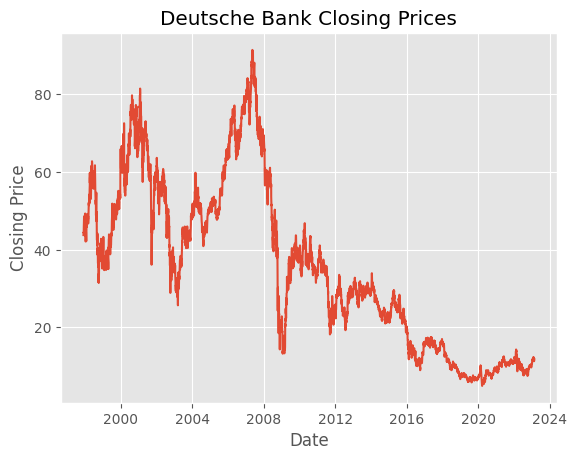

In [53]:
# plot the closing price over time
plt.plot(dbbank_df['Date'], dbbank_df['Close'])
plt.title('Deutsche Bank Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

### 3. Calculate returns 

We can use pandas to calculate the daily returns of the stock, which can be useful for analysis and modeling:

    ```
    # calculate daily returns
    df['Return'] = df['Close'].pct_change()
    # plot the returns over time
    plt.plot(df['Date'], df['Return'])
    plt.title('Deutsche Bank Daily Returns')
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.show()
    ```

`pct_change()` is a pandas function that calculates the percentage change between the current and a prior element. It is often used to calculate the daily or periodical returns of a financial asset.

The formula used to calculate the percentage change for a given time period is:

$\text{Percentage change for a given period of time} = \frac{(\text{current price} - \text{prior price})}{\text{prior price}} \times 100$

where "current price" is the price at the current time period, and "prior price" is the price at the previous time period.

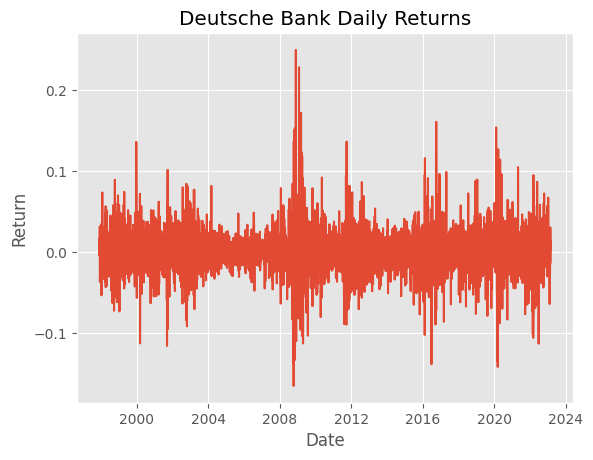

In [54]:
# calculate daily returns
dbbank_df['Return'] = dbbank_df['Close'].pct_change()
# plot the returns over time
plt.plot(dbbank_df['Date'], dbbank_df['Return'])
plt.title('Deutsche Bank Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()

In the case of the `dbbank_df['Return']` column, `pct_change()` is applied to the `Close` column of the DataFrame, which contains the closing prices of Deutsche Bank's stock. The resulting `Return` column contains the daily percentage changes in the stock price.

### 4. Analyze relationships between variables
You can use seaborn to create scatter plots and regression plots to explore the relationships between variables. For example, to create a scatter plot of the opening price vs. the closing price:

    ```
    # create a scatter plot of Open vs. Close
    sns.scatterplot(data=df, x='Open', y='Close')
    plt.title('Deutsche Bank Open vs. Close')
    plt.show()
    ```

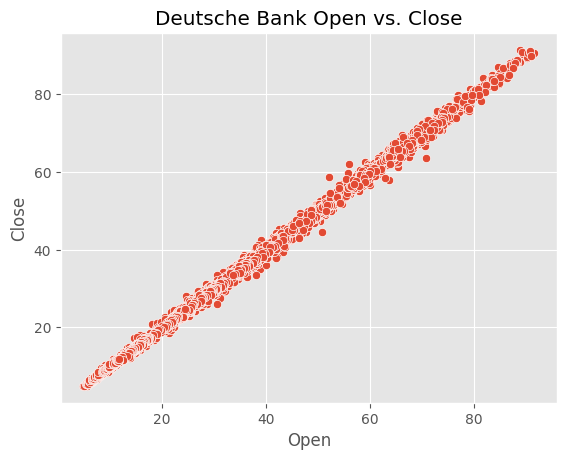

In [55]:
# create a scatter plot of Open vs. Close
sns.scatterplot(data=dbbank_df, x='Open', y='Close')
plt.title('Deutsche Bank Open vs. Close')
plt.show()

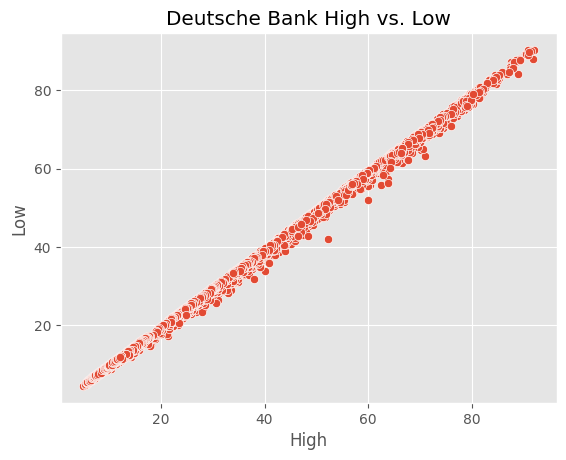

In [56]:
# create a scatter plot of Open vs. Close
sns.scatterplot(data=dbbank_df, x='High', y='Low')
plt.title('Deutsche Bank High vs. Low')
plt.show()

In [57]:
dbbank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume (shares)', 'Return'], dtype='object')

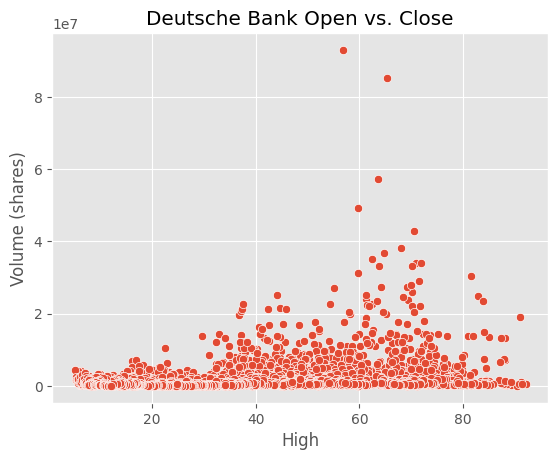

In [58]:
# create a scatter plot of Open vs. Close
sns.scatterplot(data=dbbank_df, x='High', y='Volume (shares)')
plt.title('Deutsche Bank Open vs. Close')
plt.show()

## Conclusion

Through data analysis, Deutsche Bank is able to identify potential risks associated with its investment products and take appropriate measures to manage those risks. This helps the bank make informed decisions about which products to invest in and which to avoid, ultimately reducing the overall risk of its investment portfolio.

Extra for future reference

In [59]:
import yfinance as yf
import pandas as pd

# Set the ticker symbol for Deutsche Bank
tickerdb = 'DB'
tickerbac = 'BAC'

# Download the live share price data for Deutsche Bank
db_stock_data = yf.download([tickerdb,tickerbac], period='1d', interval='1m')

# Download the live share price data for Deutsche Bank
# bac_stock_data = yf.download(tickerbac, period='1d', interval='1m')

# Create a pandas dataframe from the stock data
db_df = pd.DataFrame(db_stock_data)

# Print the dataframe to verify the data has been imported
db_df

[*********************100%***********************]  2 of 2 completed


Adj Close               Close                High  \
                                 BAC       DB        BAC       DB        BAC   
Datetime                                                                       
2023-02-17 09:30:00-05:00  35.080002  12.6200  35.080002  12.6200  35.095001   
2023-02-17 09:31:00-05:00  35.020000  12.6050  35.020000  12.6050  35.089802   
2023-02-17 09:32:00-05:00  35.000000  12.6100  35.000000  12.6100  35.020000   
2023-02-17 09:33:00-05:00  35.000000  12.5958  35.000000  12.5958  35.025002   
2023-02-17 09:34:00-05:00  34.980000  12.5930  34.980000  12.5930  34.997898   
...                              ...      ...        ...      ...        ...   
2023-02-17 15:55:00-05:00  35.314999  12.7150  35.314999  12.7150  35.330002   
2023-02-17 15:56:00-05:00  35.299999  12.7100  35.299999  12.7100  35.314999   
2023-02-17 15:57:00-05:00  35.294998  12.7100  35.294998  12.7100  35.310001   
2023-02-17 15:58:00-05:00  35.320000  12.7100  35.320000  12.7100  35.330002   
2023-02-17 15:59:00-05:00  35.369999  12.7100  35.369999  12.7100  35.369999   

                                         Low                Open           \
                               DB        BAC       DB        BAC       DB   
Datetime                                                                    
2023-02-17 09:30:00-05:00  12.620  35.080002  12.6200  35.095001  12.6200   
2023-02-17 09:31:00-05:00  12.615  35.009998  12.6050  35.089802  12.6100   
2023-02-17 09:32:00-05:00  12.610  34.975498  12.6007  35.020000  12.6100   
2023-02-17 09:33:00-05:00  12.610  34.959999  12.5950  34.994999  12.6050   
2023-02-17 09:34:00-05:00  12.600  34.945000  12.5930  34.990002  12.5999   
...                           ...        ...      ...        ...      ...   
2023-02-17 15:55:00-05:00  12.720  35.285000  12.7100  35.299999  12.7100   
2023-02-17 15:56:00-05:00  12.715  35.299999  12.7100  35.310001  12.7150   
2023-02-17 15:57:00-05:00  12.715  35.290001  12.7100  35.305000  12.7100   
2023-02-17 15:58:00-05:00  12.715  35.290001  12.7100  35.299999  12.7100   
2023-02-17 15:59:00-05:00  12.720  35.310001  12.7100  35.320000  12.7150   

                            Volume           
                               BAC       DB  
Datetime                                     
2023-02-17 09:30:00-05:00  1072405  66852.0  
2023-02-17 09:31:00-05:00   135621  30999.0  
2023-02-17 09:32:00-05:00   217348  21956.0  
2023-02-17 09:33:00-05:00   125894  27665.0  
2023-02-17 09:34:00-05:00    77402   2272.0  
...                            ...      ...  
2023-02-17 15:55:00-05:00   202830  26442.0  
2023-02-17 15:56:00-05:00    99838   7390.0  
2023-02-17 15:57:00-05:00   159330   9529.0  
2023-02-17 15:58:00-05:00   168311  12926.0  
2023-02-17 15:59:00-05:00   500885  32109.0  

[390 rows x 12 columns]

**Extra;**

The below code shows how to get data for AAPL from 2016 to 2019 and plot the adjusted closing price of the data.

https://towardsdatascience.com/historical-stock-price-data-in-python-a0b6dc826836

[*********************100%***********************]  1 of 1 completed


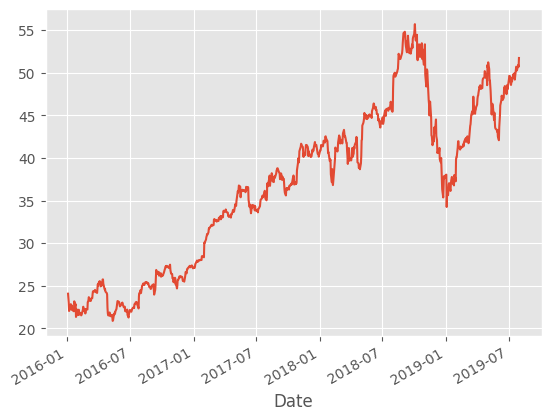

[*********************100%***********************]  1 of 1 completed


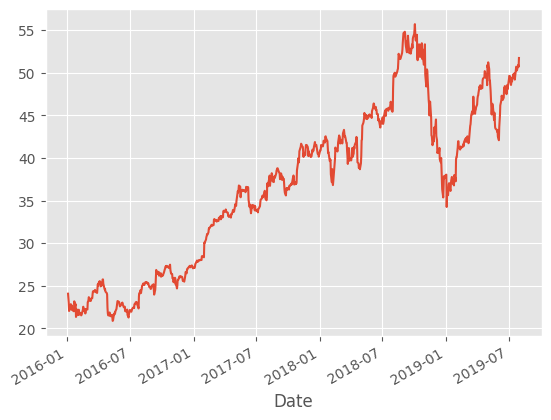

In [60]:
# Get the data for the stock AAPL
data = yf.download('AAPL','2016-01-01','2019-08-01')

# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()# Get the data for the stock AAPL
data = yf.download('AAPL','2016-01-01','2019-08-01')

# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()

Data for multiple stocks:

In the below code, we will fetch the data of multiple stocks and store it in a dataframe data. Then we will calculate the daily returns and plot the cumulative returns of all the stock prices using matplotlib package.

In [61]:
tickers_list = ['AAPL', 'WMT', 'IBM', 'MU', 'BA', 'AXP']

# Fetch the data
import yfinance as yf
data = yf.download(tickers_list,'2015-1-1')['Adj Close']

# Print first 5 rows of the data
print(data.head())

[*********************100%***********************]  6 of 6 completed
                 AAPL        AXP          BA         IBM         MU        WMT
Date                                                                          
2015-01-02  24.565701  82.201302  113.657211  108.148613  34.398560  72.252899
2015-01-05  23.873644  80.027428  112.870056  106.446945  33.438374  72.042603
2015-01-06  23.875887  78.321877  111.540627  104.151283  32.537575  72.597771
2015-01-07  24.210682  80.032425  113.272385  103.470573  31.775360  74.523956
2015-01-08  25.140909  81.166916  115.275276  105.719498  33.329483  76.096870


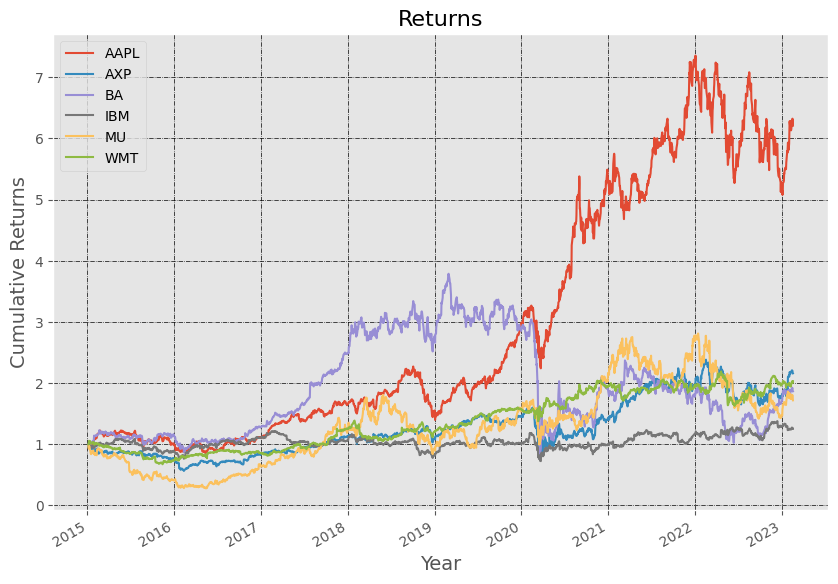

In [62]:
# Plot all the close prices
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

Minute level data:

Through yfinance, you can also fetch the data of minute frequency. You can download for other frequency by just tweaking the interval parameter on line no 8 below. Following values are supported in the interval: 1m, 5m, 15m, 30m, 60m.

In [63]:
# Import package
import yfinance as yf

# Get the data
data = yf.download(tickers="MSFT", period="5d", interval="1m")

# Print the data
print(data.tail())

[*********************100%***********************]  1 of 1 completed
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-02-17 15:55:00-05:00  257.709991  258.299988  257.709991  258.119995   
2023-02-17 15:56:00-05:00  258.130005  258.279999  258.000000  258.119995   
2023-02-17 15:57:00-05:00  258.119995  258.160004  257.785004  257.869995   
2023-02-17 15:58:00-05:00  257.880005  258.040009  257.769989  257.929993   
2023-02-17 15:59:00-05:00  257.930115  258.119995  257.799988  258.089996   

                            Adj Close  Volume  
Datetime                                       
2023-02-17 15:55:00-05:00  258.119995  190211  
2023-02-17 15:56:00-05:00  258.119995  179955  
2023-02-17 15:57:00-05:00  257.869995  211603  
2023-02-17 15:58:00-05:00  257.929993  175631  
2023-02-17 15:59:00-05:00  258.089996  304945  


You can analyze this data, create a trading strategy and analyze the performance of the strategy using the pyfolio package. It computes the Sharpe ratio, Sortino ratio, maximum drawdowns and many other metrics.